<a href="https://colab.research.google.com/github/saifjamil/Predicting-The-Price-Of-The-House/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

# Load the Boston Housing dataset from UCI repository
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price']
dataset = pd.read_csv(data_url, sep='\s+', names=column_names)

# Display the first few rows
dataset.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64
             CRIM        ZN     INDUS   

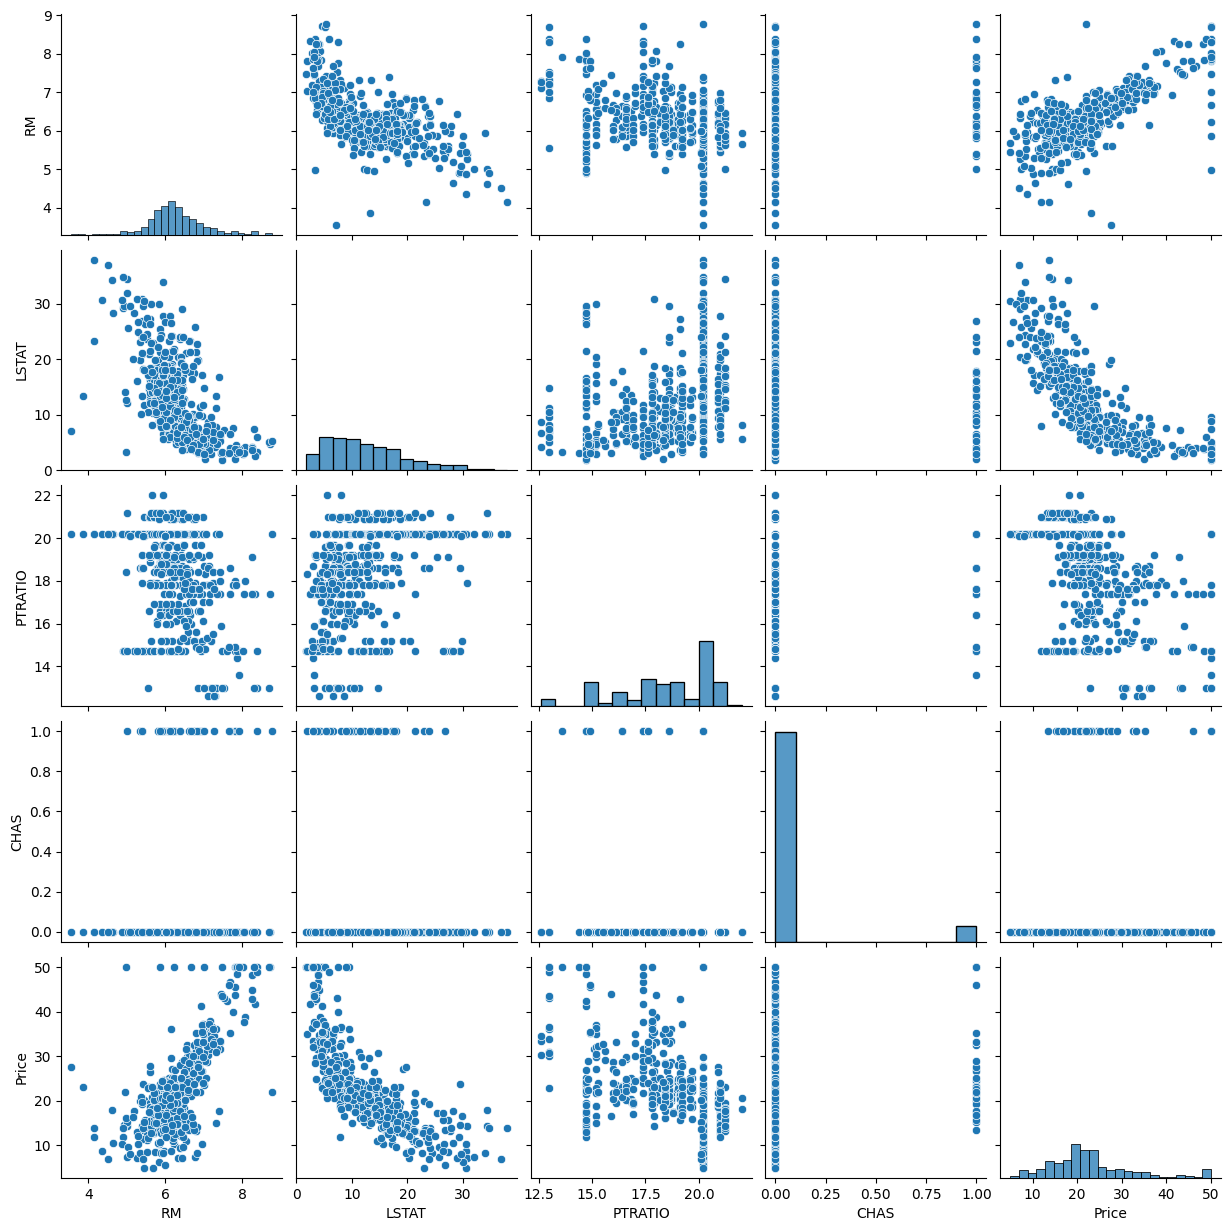

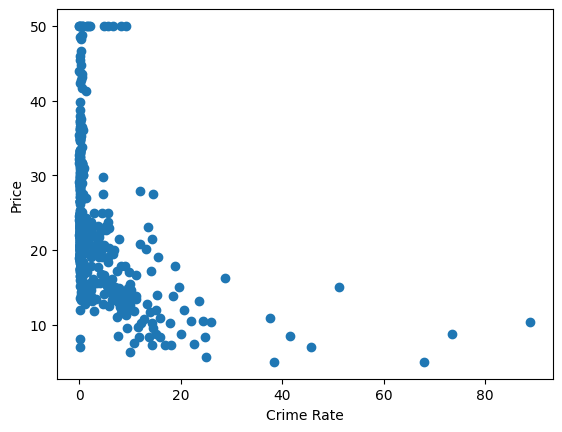

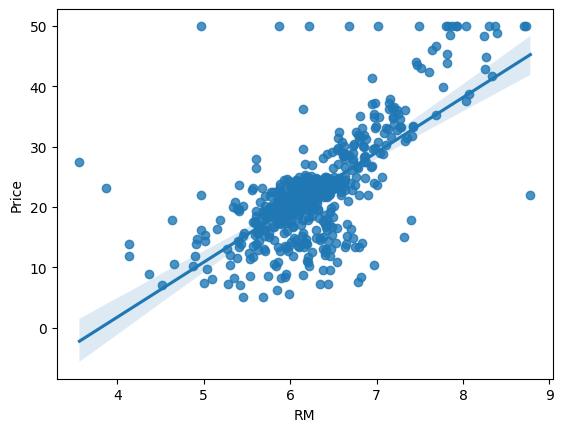

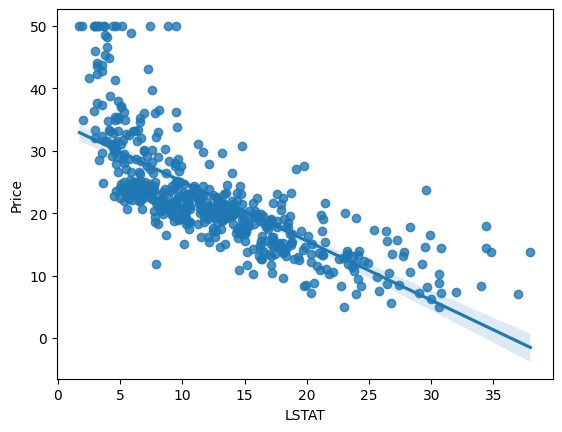

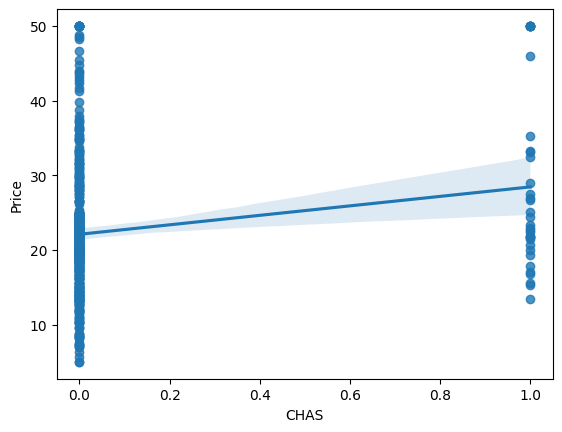

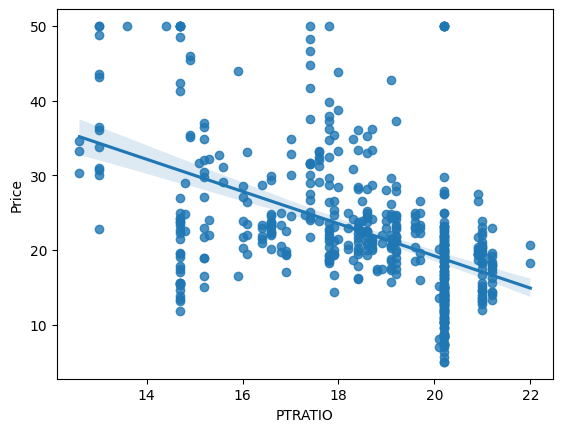

In [6]:
# Check dataset information
dataset.info()

# Summarize statistics
dataset.describe()

# Check for missing values
print(dataset.isnull().sum())

# Correlation analysis
print(dataset.corr())

# Visualize correlations with a pairplot
sns.pairplot(dataset[['RM', 'LSTAT', 'PTRATIO', 'CHAS', 'Price']])  # Subset for clarity
plt.show()

# Scatter plot: Crime Rate vs Price
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")
plt.show()

# Scatter plot: Rooms vs Price with regression line
sns.regplot(x="RM", y="Price", data=dataset)
plt.show()

# Scatter plot: LSTAT vs Price with regression line
sns.regplot(x="LSTAT", y="Price", data=dataset)
plt.show()

# Scatter plot: CHAS vs Price with regression line
sns.regplot(x="CHAS", y="Price", data=dataset)
plt.show()

# Scatter plot: PTRATIO vs Price with regression line
sns.regplot(x="PTRATIO", y="Price", data=dataset)
plt.show()

In [7]:
# Separate independent (X) and dependent (y) features
X = dataset.drop('Price', axis=1)
y = dataset['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler for later use
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [8]:
# Initialize and train the linear regression model
regression = LinearRegression()
regression.fit(X_train, y_train)

# Print coefficients and intercept
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

# Print model parameters
print("Model Parameters:", regression.get_params())

Coefficients: [-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Intercept: 23.01581920903955
Model Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


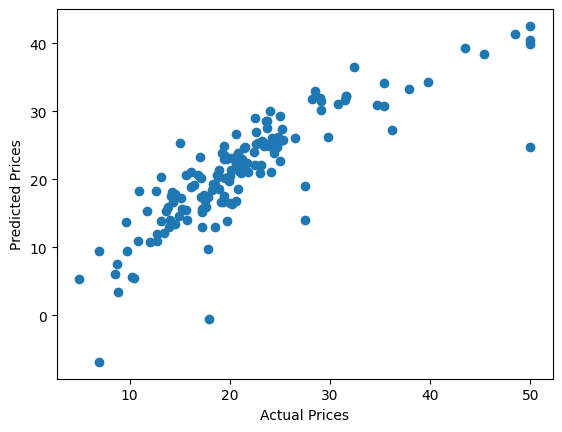

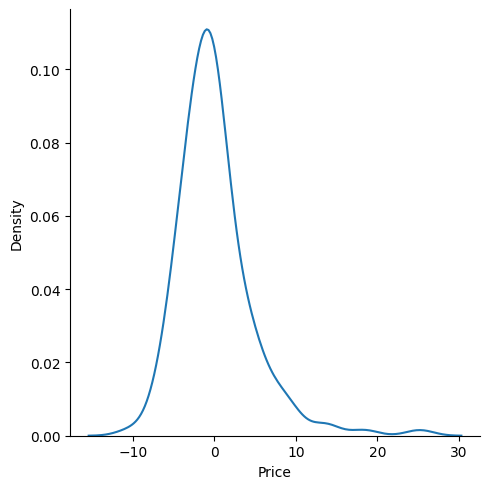

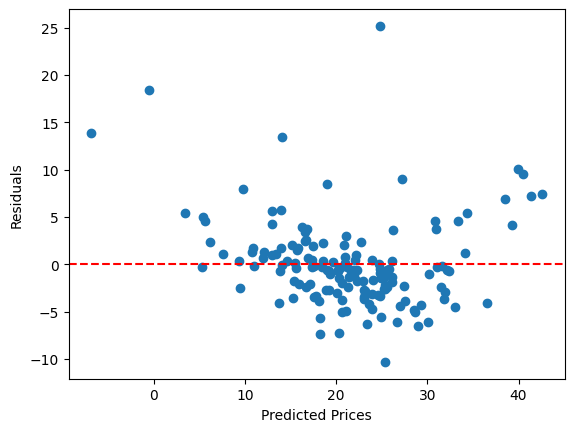

Mean Absolute Error: 3.1627098714574053
Mean Squared Error: 21.51744423117721
Root Mean Squared Error: 4.6386899261728205
R-squared: 0.7112260057484932
Adjusted R-squared: 0.6840226584639308


In [9]:
# Make predictions on test data
reg_pred = regression.predict(X_test)

# Scatter plot of actual vs predicted values
plt.scatter(y_test, reg_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

# Calculate residuals
residuals = y_test - reg_pred

# Plot residuals distribution
sns.displot(residuals, kind="kde")
plt.show()

# Scatter plot of predictions vs residuals
plt.scatter(reg_pred, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Calculate performance metrics
print("Mean Absolute Error:", mean_absolute_error(y_test, reg_pred))
print("Mean Squared Error:", mean_squared_error(y_test, reg_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, reg_pred)))

# Calculate R-squared
score = r2_score(y_test, reg_pred)
print("R-squared:", score)

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print("Adjusted R-squared:", adjusted_r2)

In [11]:
# Predict on a single new data point (first row of original data)
new_data = dataset.drop('Price', axis=1).iloc[0:1]  # Keep as DataFrame
new_data_scaled = scaler.transform(new_data)
prediction = regression.predict(new_data_scaled)
print("Prediction for new data:", prediction)

# Save the model for deployment
pickle.dump(regression, open('regmodel.pkl', 'wb'))

# Load and test the pickled model
pickled_model = pickle.load(open('regmodel.pkl', 'rb'))
print("Prediction using pickled model:", pickled_model.predict(new_data_scaled))

Prediction for new data: [30.08649576]
Prediction using pickled model: [30.08649576]
